<h1 style="text-align: center;">VISUALIZING THE WNBA COURT</h1>

Using Matplotlib and following how [Arya Shah](https://www.kaggle.com/code/aryashah2k/sports-analytics-visualization) was able to visualize the American Football field, I wrote this function to visualized a scaled WNBA court. Arya gives very good instructions and even references another coder's master skills with this. So if you are looking to learn or level up your skills. I suggest you check out their Kaggle pages.

I liked the idea of being able to map out NFL plays on a field. That may not be as useful for a WNBA team. But some other stats like where teams are hitting their shots may be useful.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, Arc

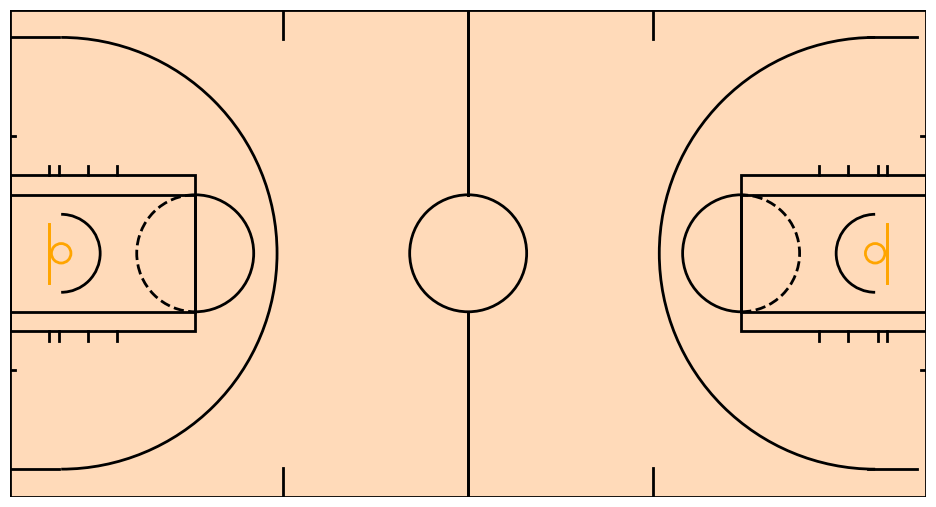

In [2]:
def draw_rectangle(ax, xy, width, height, color='none', lw=2):
    """Draws a rectangle on the court."""
    rect = patches.Rectangle(xy, width, height, edgecolor='black', facecolor=color, lw=lw)
    ax.add_patch(rect)

def draw_line(ax, x_values, y_values, color='black', lw=2, linestyle='solid'):
    """Draws a straight line on the court."""
    ax.plot(x_values, y_values, color=color, lw=lw, linestyle=linestyle)

def draw_arc(ax, xy, width, height, theta1, theta2, color='black', lw=2, linestyle='solid'):
    """Draws an arc on the court."""
    arc = Arc(xy, width, height, angle=0, theta1=theta1, theta2=theta2, color=color, lw=lw, linestyle=linestyle)
    ax.add_patch(arc)

def draw_circle(ax, xy, radius, color='black', fill=False, lw=2):
    """Draws a circle on the court."""
    circle = Circle(xy, radius, edgecolor=color, facecolor='none' if not fill else color, lw=lw)
    ax.add_patch(circle)

def create_basketball_court():
    fig, ax = plt.subplots(figsize=(12, 6.33))

    # Court background
    draw_rectangle(ax, (0, 0), 94, 50, color='peachpuff', lw=0)
    draw_rectangle(ax, (0,0), 94, 50)

    # Center court line
    for x in [47, 47]:
        draw_line(ax, [x, x], [31, 50])
        draw_line(ax, [x, x], [0, 19])

    # Free-throw areas
    for x in [0, 75]:  # Left and right
        draw_rectangle(ax, (x, 19), 19, 12)  # Inner rectangle
        draw_rectangle(ax, (x, 17), 19, 16)  # Outer rectangle

    # Free-throw circles (Half solid, half dashed)
    for x in [19, 75]:  # Left and right
        draw_arc(ax, (x, 25), 12, 12, 270, 90, linestyle='solid' if x == 19 else 'dashed')  # Right side of the arc
        draw_arc(ax, (x, 25), 12, 12, 90, 270, linestyle='dashed' if x == 19 else 'solid')  # Left side of the arc

    # Center court circle
    draw_circle(ax, (47, 25), 6)

    # Tick marks near free-throw areas
    tick_x_positions = [4, 5, 8, 11]
    for x in tick_x_positions:
        draw_line(ax, [x, x], [33, 34])  # Top left
        draw_line(ax, [x, x], [17, 16])  # Bottom left
        draw_line(ax, [94 - x, 94 - x], [33, 34])  # Top right
        draw_line(ax, [94 - x, 94 - x], [17, 16])  # Bottom right

    # Sideline inbound lines
    for x in [28, 66]:
        draw_line(ax, [x, x], [0, 3])  # Bottom
        draw_line(ax, [x, x], [50, 47])  # Top

    # Baseline inbound lines
    for x in [0, 93.5]:
        draw_line(ax, [x, x + 0.5], [13, 13])
        draw_line(ax, [x, x + 0.5], [37, 37])
        
    # Three point line
    draw_arc(ax, (5.25, 25), 44.29, 44.29, 270, 90)
    draw_arc(ax, (88.75, 25), 44.29, 44.29, 90, 270)
    
    for x in [0, 88]:
        draw_line(ax, [x, x + 5], [2.8542, 2.8542])
        draw_line(ax, [x, x + 5], [47.1458, 47.1458])

    # Baskets and restricted area
    for x in [4, 90]:  # Left and right
        draw_circle(ax, (x + 1.25 if x == 4 else x - 1.25, 25), 1, color='orange')  # Basket
        draw_line(ax, [x, x], [22, 28], color='orange')  # Hoop connection
        draw_line(ax, [x, x], [22, 28], color='orange')  # Hoop connection
        draw_arc(ax, (x + 1.25 if x == 4 else x - 1.25, 25), 8, 8, 270 if x == 4 else 90, 90 if x == 4 else 270)  # Restricted area

    # Hide axes
    ax.set_xlim(0, 94)
    ax.set_ylim(0, 50)
    ax.set_aspect('equal')
    plt.axis('off')

    return fig, ax

# Run the function
fig, ax = create_basketball_court()
plt.show()